In [1]:
!pip install opencv-python numpy matplotlib

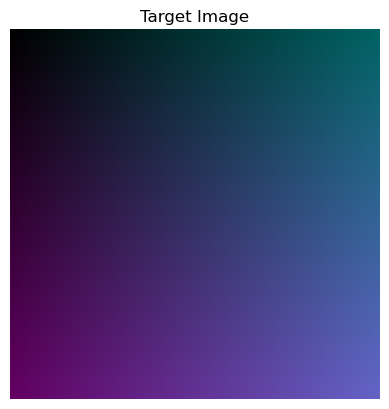

In [15]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

# --- CONFIGURATION ---
TILE_SIZE = 20  # Size of each tile (in pixels)
GRID_SIZE = 10  # 10x10 grid of tiles

# --- Step 1: Create a Target Image ---
# We'll create a gradient image as our target
target = np.zeros((TILE_SIZE * GRID_SIZE, TILE_SIZE * GRID_SIZE, 3), dtype=np.uint8)

for i in range(target.shape[0]):
    for j in range(target.shape[1]):
        target[i, j] = [(i // 2) % 256, (j // 2) % 256, ((i + j) // 2) % 256]

plt.imshow(target)
plt.title("Target Image")
plt.axis('off')
plt.show()


In [17]:
# --- Step 2: Generate Some Tile Images ---
def generate_tile_colors(n):
    colors = [
        (255, 0, 0),     # Red
        (0, 255, 0),     # Green
        (0, 0, 255),     # Blue
        (255, 255, 0),   # Yellow
        (0, 255, 255),   # Cyan
        (255, 0, 255),   # Magenta
        (128, 128, 128), # Gray
        (255, 255, 255), # White
        (0, 0, 0),       # Black
        (100, 50, 200)   # Purple
    ]
    return [np.full((TILE_SIZE, TILE_SIZE, 3), color, dtype=np.uint8) for color in colors[:n]]

tiles = generate_tile_colors(10)


In [18]:
# --- Step 3: Compute Average Colors of Tiles ---
def average_color(img):
    return np.mean(img, axis=(0, 1))

tile_avg_colors = [average_color(tile) for tile in tiles]
tile_colors_np = np.array(tile_avg_colors)


In [19]:
# --- Step 4: Build the Mosaic ---
rows, cols = target.shape[0] // TILE_SIZE, target.shape[1] // TILE_SIZE
mosaic = np.zeros_like(target)

def closest_tile(avg_color, tile_colors):
    diffs = np.linalg.norm(tile_colors - avg_color, axis=1)
    return np.argmin(diffs)

for i in range(rows):
    for j in range(cols):
        y0, y1 = i * TILE_SIZE, (i + 1) * TILE_SIZE
        x0, x1 = j * TILE_SIZE, (j + 1) * TILE_SIZE

        block = target[y0:y1, x0:x1]
        avg = average_color(block)
        index = closest_tile(avg, tile_colors_np)

        mosaic[y0:y1, x0:x1] = tiles[index]
